In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/"

In [3]:
f_out_file = paste0(mydir,'data/analysis_results/20200103_data_freeze/differentiation_trajectories/cell_fractions.all_timepoints.all_complete_trajectories.tsv')
pca_out_file = paste0(mydir,'data/analysis_results/20200103_data_freeze/differentiation_trajectories/cell_fractions.all_timepoints.all_complete_trajectories.PCA.tsv')

In [4]:
df_prop = read.csv(f_out_file, sep = "\t")
head(df_prop)

donor_id,pool_id,FPP_D11,NB_D11,P_FPP_D11,Astro_D30,CHem_D30,DA_D30,Epen1_D30,P_FPP_D30,...,Astro_D52,CHem_D52,DA_D52,Epen1_D52,Epen2_D52,FPP_D52,P_FPP_D52,P_Sert_D52,Sert_D52,unknown_D52
HPSI0114i-eipl_1,pool1,0.5364132,0.073147257,0.3904395,0.29834041,0.333461984,0.01968352,0.253570050,0.04438441,...,0.511933680,0.0904569115,0.009562367,0.138153075,0.0030846347,0.15789474,0.079699248,0.0001927897,0.003315982,0.005706574
HPSI0114i-wegi_1,pool6,0.5504220,0.000000000,0.4495780,0.13830558,0.005068791,0.10137581,0.006154960,0.09956553,...,0.001728111,0.0008640553,0.047235023,0.007200461,0.0002880184,0.04781106,0.002016129,0.0025921659,0.861463134,0.028801843
HPSI0114i-wegi_1,pool7,0.6711111,0.004444444,0.3244444,0.05024311,0.000000000,0.52350081,0.001620746,0.03403566,...,0.017612524,0.0000000000,0.592954990,0.000000000,0.0000000000,0.01174168,0.000000000,0.0000000000,0.293542074,0.084148728
HPSI0115i-aion_2,pool4,0.5584594,0.002751032,0.4387895,0.10604192,0.012330456,0.55240444,0.054254007,0.02589396,...,0.005176877,0.0155306299,0.313201035,0.149266609,0.0034512511,0.08541846,0.010353753,0.0086281277,0.398619500,0.010353753
HPSI0115i-aoxv_1,pool8,0.5391786,0.030585494,0.4302359,0.37200918,0.072763029,0.08423468,0.298590626,0.04949197,...,0.025941631,0.0486405587,0.081317037,0.534048391,0.0177101522,0.10850586,0.022948366,0.0049887753,0.139935146,0.015964081
HPSI0115i-bimq_4,pool4,0.5390750,0.132376396,0.3285486,0.36225895,0.192837466,0.18181818,0.148760331,0.07162534,...,0.361293346,0.1030927835,0.052014995,0.156513590,0.0023430178,0.17619494,0.108247423,0.0000000000,0.035613871,0.004686036


In [5]:
df_pca = read.csv(pca_out_file, sep = "\t")
head(df_pca)

donor_id,pool_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
HPSI0114i-eipl_1,pool1,0.5677167,-0.01367960,0.39233382,0.009068288,-0.033492469,-0.08485208,-0.01546020,-0.053418757,0.041803885,-0.043790191
HPSI0114i-wegi_1,pool6,-0.4914857,-0.65860144,0.10461253,0.009256117,0.009257946,0.01751410,-0.05641375,0.052746274,-0.008646654,0.015523836
HPSI0114i-wegi_1,pool7,-0.4626597,0.24577121,0.06143014,-0.186339252,-0.079454519,0.11464528,-0.20945720,-0.027912701,-0.070024954,0.036489114
HPSI0115i-aion_2,pool4,-0.3213558,0.12003841,-0.05276415,-0.029334965,-0.050232778,0.01073035,0.06192593,0.030122622,0.027519550,-0.009384255
HPSI0115i-aoxv_1,pool8,0.3974012,-0.12324291,-0.27707915,0.002604215,-0.038938741,0.03454042,-0.04181556,-0.004850481,0.022924765,-0.042832670
HPSI0115i-bimq_4,pool4,0.4212096,0.05948631,0.26125499,-0.050445552,0.044168521,-0.05980972,0.02712366,0.048732804,0.004741356,0.028764518


In [6]:
df = inner_join(df_pca, df_prop)
df$diff_eff = df$DA_D52 + df$Sert_D52
head(df,2)

Joining, by = c("donor_id", "pool_id")


donor_id,pool_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,CHem_D52,DA_D52,Epen1_D52,Epen2_D52,FPP_D52,P_FPP_D52,P_Sert_D52,Sert_D52,unknown_D52,diff_eff
HPSI0114i-eipl_1,pool1,0.5677167,-0.0136796,0.3923338,0.009068288,-0.033492469,-0.08485208,-0.01546020,-0.05341876,...,0.0904569115,0.009562367,0.138153075,0.0030846347,0.15789474,0.079699248,0.0001927897,0.003315982,0.005706574,0.01287835
HPSI0114i-wegi_1,pool6,-0.4914857,-0.6586014,0.1046125,0.009256117,0.009257946,0.01751410,-0.05641375,0.05274627,...,0.0008640553,0.047235023,0.007200461,0.0002880184,0.04781106,0.002016129,0.0025921659,0.861463134,0.028801843,0.90869816


Warning message:
“Use of `df$diff_eff` is discouraged. Use `diff_eff` instead.”

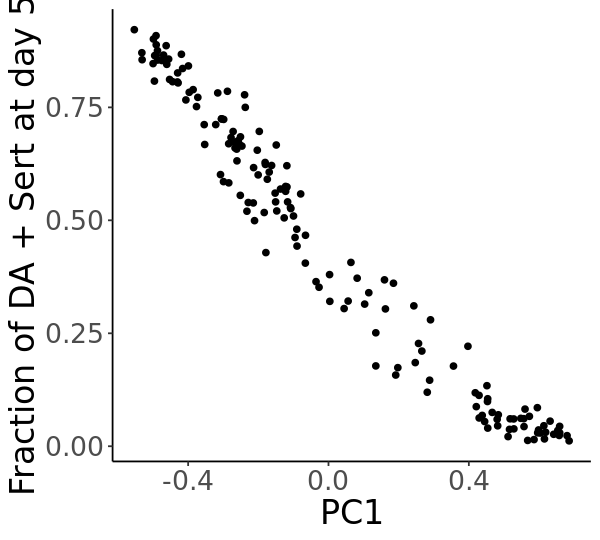

In [10]:
options(repr.plot.width=5, repr.plot.height=4.5)
ggplot(df, aes(x = PC1, y = df$diff_eff)) + geom_point() + theme_classic() + 
    xlab("PC1") + ylab("Fraction of DA + Sert at day 52") + 
    theme(text = element_text(size=20)) 

In [11]:
fig_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/extended_figures/"
pdf(paste0(fig_dir,"Extended_Figure2c.pdf"), width=5, height=4.5)
ggplot(df, aes(x = PC1, y = df$diff_eff)) + geom_point() + theme_classic() + 
    xlab("PC1") + ylab("Fraction of DA + Sert at day 52") + 
    theme(text = element_text(size=20)) 
dev.off()

Warning message:
“Use of `df$diff_eff` is discouraged. Use `diff_eff` instead.”

png 
  2